In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [3]:
# membaca dataset seattle-weather
df = pd.read_csv('/content/drive/MyDrive/dataset/seattle-weather.csv')

In [4]:
# menampilkan 15 baris data teratas
df.head(15)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [5]:
# mengecek nilai kosong
print(df.isnull())

       date  precipitation  temp_max  temp_min   wind  weather
0     False          False     False     False  False    False
1     False          False     False     False  False    False
2     False          False     False     False  False    False
3     False          False     False     False  False    False
4     False          False     False     False  False    False
...     ...            ...       ...       ...    ...      ...
1456  False          False     False     False  False    False
1457  False          False     False     False  False    False
1458  False          False     False     False  False    False
1459  False          False     False     False  False    False
1460  False          False     False     False  False    False

[1461 rows x 6 columns]


In [6]:
# menghapus nilai kosong
df = df.dropna()
print(df)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


In [7]:
# menghapus (drop) kolom "date"
df = df.drop('date', axis=1)
print(df)

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]


In [8]:
is_date_exist = 'date' in df.columns
print(is_date_exist)

False


In [9]:
# mengecek nilai duplikat
duplikat = df[df.duplicated()]
print(duplikat)

      precipitation  temp_max  temp_min  wind weather
188             0.0      26.7      12.8   3.8     sun
629             0.0      21.1      13.3   2.5     sun
748             0.0       9.4       0.6   2.2     sun
751             0.0      10.0       1.7   1.5     sun
863             0.0      26.7      12.8   3.8     sun
959             0.0      27.8      15.0   2.8     sun
1019            0.0      20.6      11.1   3.3     sun
1346            0.0      22.8      13.3   2.4     sun


In [10]:
jumlah_duplikat = df.duplicated().sum()
print(jumlah_duplikat)

8


In [12]:
# menghapus nilai duplikat
df = df.drop_duplicates()
print(df)

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1453 rows x 5 columns]


In [13]:
jumlah_duplikat = df.duplicated().sum()
print(jumlah_duplikat)

0


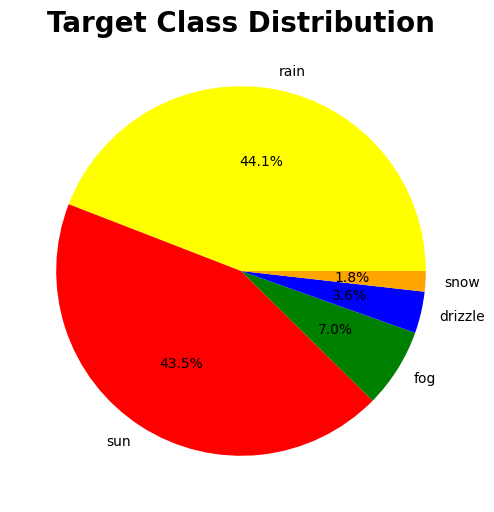

In [14]:
# visualisasi distribusi target-class
target_class_distribution = df['weather'].value_counts()

warna = {'drizzle': 'blue', 'fog': 'green', 'snow': 'orange', 'sun': 'red', 'rain': 'yellow'}

plt.figure(figsize=(10, 6))
plt.pie(target_class_distribution, labels = target_class_distribution.index, colors = [warna[i] for i in target_class_distribution.index], autopct='%1.1f%%')
plt.title('Target Class Distribution', fontsize=20, fontweight='bold')
plt.show()

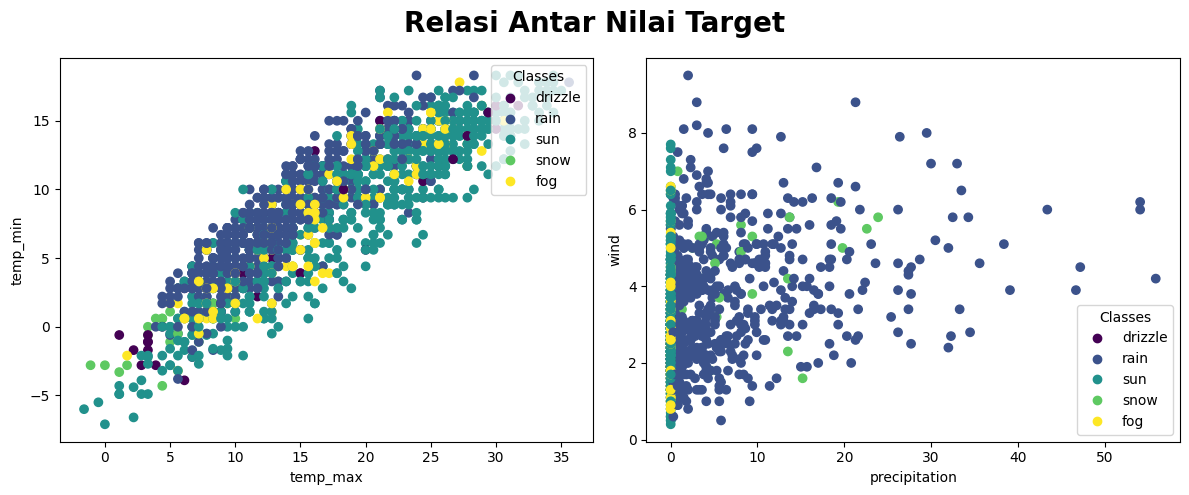

In [15]:
target_names= df['weather'].unique()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
target = df['weather'].replace({
'drizzle': 0,
'rain': 1,
'sun': 2,
'snow': 3,
'fog': 4
})
# Visualisasi relasi fitur temp_max dan temp_min
a_scatter = axs[0].scatter(df['temp_max'], df['temp_min'], c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names, loc="upper right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'], c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

fig = fig.suptitle("Relasi Antar Nilai Target", fontsize=20, fontweight="bold")
plt.tight_layout()

# Modelling

In [ ]:
# train & test split dengan rasio 70% train-set dan 30% test-set
X = df.drop('weather', axis=1)
y = df['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

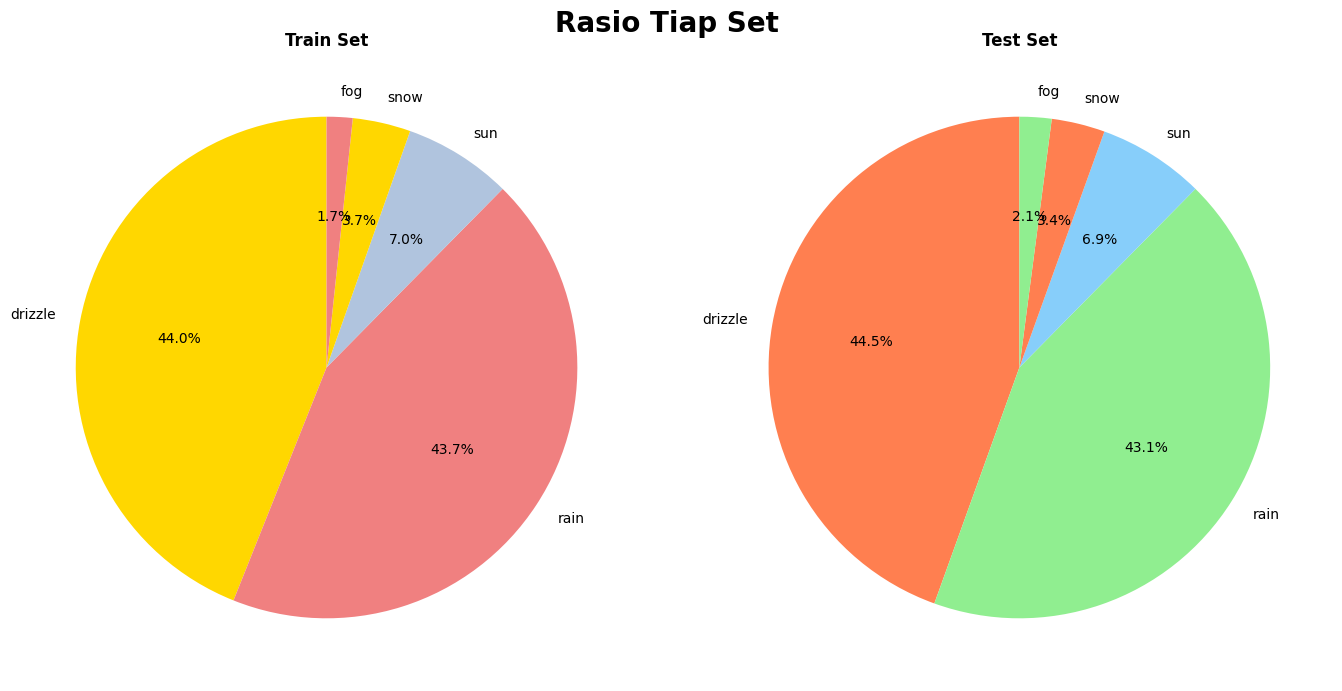

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].unique()
colors1 = ['gold', 'lightcoral', 'lightsteelblue']
colors2 = ['coral', 'lightgreen', 'lightskyblue']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

# Prediksi dengan algoritma Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     drizzle       0.17      0.20      0.18        15
         fog       0.19      0.23      0.21        30
        rain       0.92      0.93      0.93       194
        snow       0.38      0.33      0.35         9
         sun       0.80      0.76      0.78       188

    accuracy                           0.77       436
   macro avg       0.49      0.49      0.49       436
weighted avg       0.78      0.77      0.77       436



# Evaluasi

In [ ]:
# akurasi yang dihasilkan dari model yang digunakan.
akurasi = accuracy_score(y_test, y_pred)

print('Akurasi: ', akurasi)

Akurasi:  0.768348623853211


# Tuning Hyperparameter

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

model_best = grid_search.best_estimator_
y_pred = model_best.predict(X_test)

akurasi = accuracy_score(y_test, y_pred)
print('Akurasi: ', akurasi)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi:  0.8440366972477065


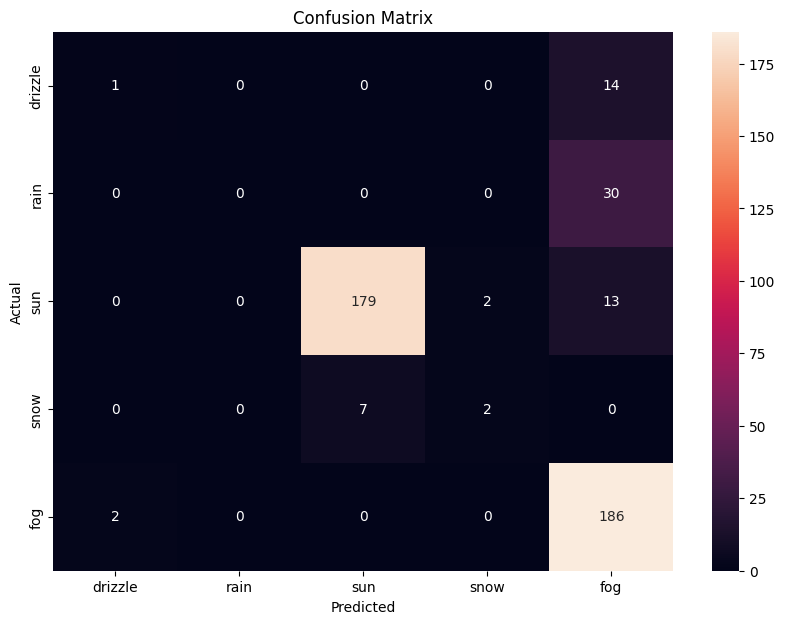

In [ ]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Esai

Berdasarkan confusion matrix yang di atas, berikut adalah hasil analisisnya:


*   **Drizzle**: Model tampaknya cukup baik dalam memprediksi cuaca “drizzle”. Sebagian besar prediksi yang seharusnya “drizzle” memang diprediksi sebagai “drizzle”. Namun, ada beberapa yang salah diprediksi sebagai “rain”.
*   **Rain**: Model sangat baik dalam memprediksi “rain”. Hampir semua prediksi yang seharusnya “rain” diprediksi dengan benar.

*   **Sun**: Model juga sangat baik dalam memprediksi “sun”. Hampir semua prediksi yang seharusnya “sun” diprediksi dengan benar.
*   **Snow**: Model tampaknya memiliki kesulitan dalam memprediksi “snow”. Banyak prediksi yang seharusnya “snow” malah diprediksi sebagai “rain” atau “sun”.
*   **Fog**: Model cukup baik dalam memprediksi “fog”, tetapi ada beberapa yang salah diprediksi sebagai “rain”.

Secara keseluruhan, model tampaknya paling baik dalam memprediksi “rain” dan “sun”, tetapi memiliki kesulitan dalam memprediksi “snow”. Ini mungkin disebabkan oleh distribusi data di dataset, di mana mungkin ada lebih banyak sampel untuk “rain” dan “sun” dibandingkan “snow”. Maka, perlu mengumpulkan lebih banyak data untuk cuaca “snow” atau mencoba teknik resampling untuk menyeimbangkan kelas.



---



Dari hasil yang diperoleh dapat diketahui bahwa:

1. Model Decision Tree: Model awal yang digunakan adalah Decision Tree dengan hyperparameter default. Model ini memberikan akurasi sekitar 76.8%.

2. Tuning Hyperparameter: Dilakukan tuning hyperparameter menggunakan GridSearchCV untuk mencari kombinasi hyperparameter yang optimal. Hyperparameter yang dicoba adalah ‘criterion’ ([‘gini’, ‘entropy’]), ‘max_depth’ ([None, 2, 4, 6, 8, 10]), ‘min_samples_split’ ([2, 5, 10]), dan ‘min_samples_leaf’ ([1, 2, 4]).

3. Hasil Tuning: Hasil tuning menunjukkan bahwa kombinasi hyperparameter terbaik adalah ‘criterion’: ‘entropy’, ‘max_depth’: 4, ‘min_samples_leaf’: 1, dan ‘min_samples_split’: 2.

4. Model Setelah Tuning: Setelah menerapkan hyperparameter terbaik ke model, akurasi meningkat menjadi sekitar 84.4%. Ini menunjukkan bahwa tuning hyperparameter dapat membantu meningkatkan performa model.

Secara keseluruhan, proses ini menunjukkan pentingnya tuning hyperparameter dalam pembuatan model machine learning. Dengan menyesuaikan hyperparameter, kita bisa mendapatkan model yang lebih baik dan akurat.